In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('kc_house_data.csv')
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


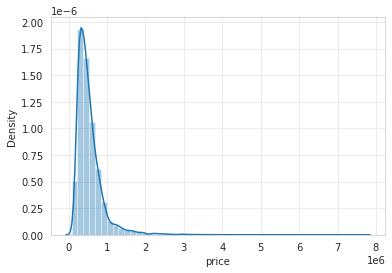

In [4]:
sns.set_style('whitegrid', {"grid.color": ".9"})
sns.distplot(df['price'])

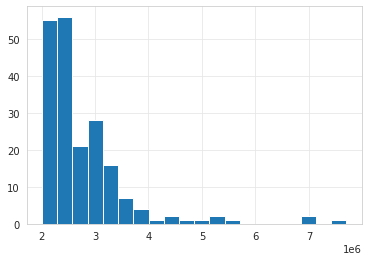

In [5]:
df[df['price']>2000000]['price'].hist(bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


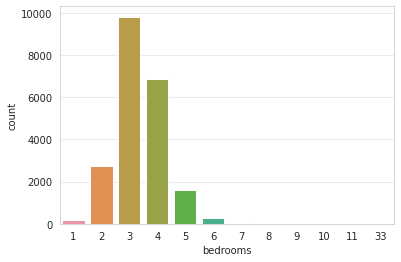

In [6]:
sns.countplot(df['bedrooms'])

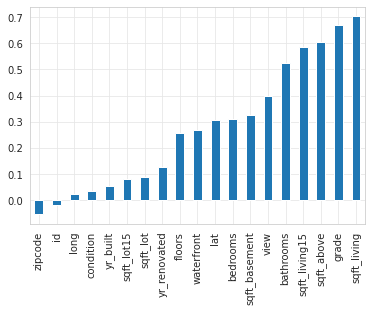

In [7]:
df.corr()['price'].sort_values().drop('price').plot(kind='bar')

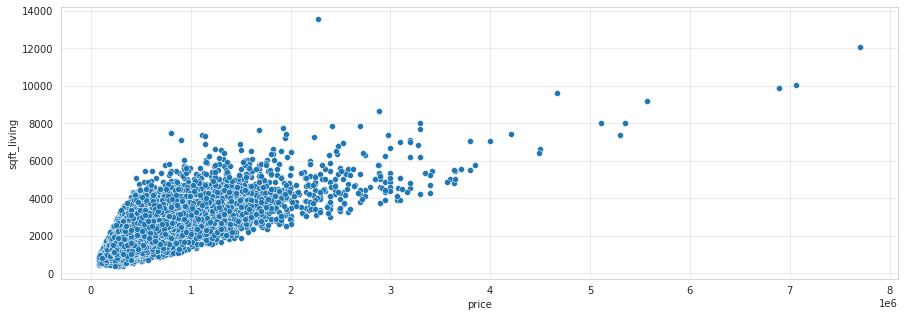

In [8]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

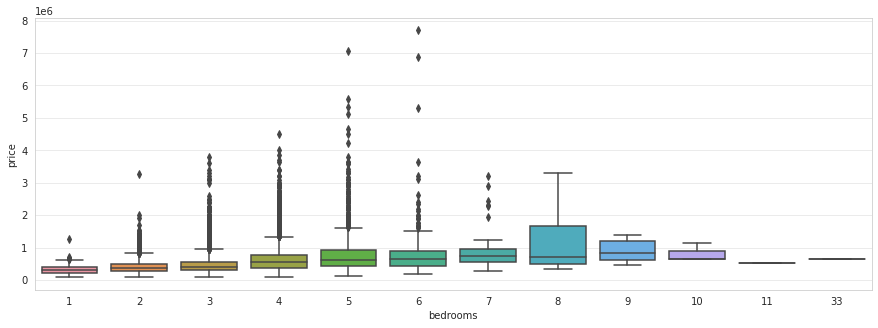

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(x='bedrooms',y='price',data=df)

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

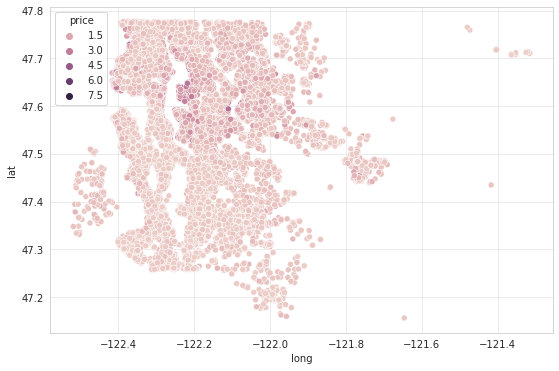

In [13]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [14]:
df.sort_values('price',ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [15]:
len(df)

21597

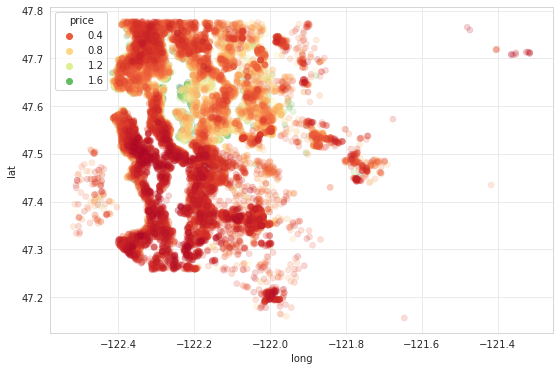

In [24]:
non_top_1_perc=df.sort_values('price',ascending=False).iloc[216:]
plt.figure(figsize=(9,6))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',alpha=0.2,
                edgecolor=None,palette='RdYlGn')

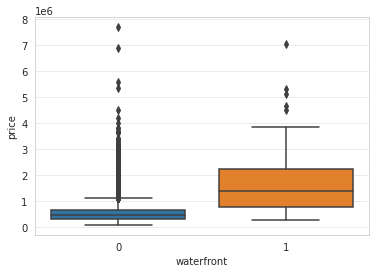

In [25]:
sns.boxplot(x='waterfront', y='price',data=df)

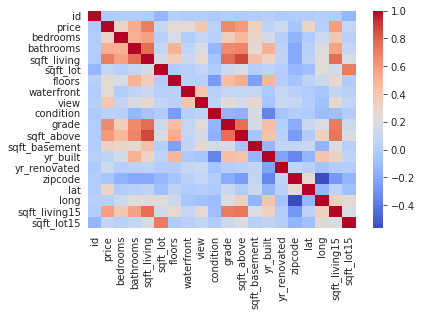

In [26]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [32]:
df['date']=pd.to_datetime(df['date'])

In [30]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [33]:
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)
df=df.drop(['id','date'],axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


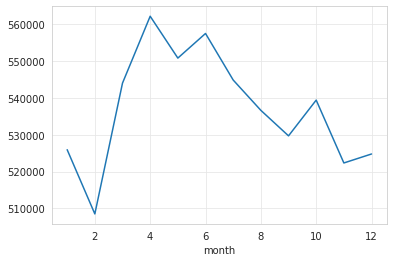

In [37]:
df.groupby('month')['price'].mean().plot()

In [39]:
df.groupby('year')['price'].mean()

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

In [43]:
df['zipcode'].nunique()

70

In [44]:
df=df.drop('zipcode',axis=1)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [48]:
X=df.drop('price',axis=1).values
y=df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape

(15117, 19)

In [50]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),batch_size=128,epochs=500)

Epoch 1/500
119/119 [==============================] - 1s 4ms/step - loss: 425297674240.0000 - val_loss: 430516404224.0000
Epoch 2/500
119/119 [==============================] - 0s 3ms/step - loss: 424800747520.0000 - val_loss: 428594692096.0000
Epoch 3/500
119/119 [==============================] - 0s 3ms/step - loss: 416251084800.0000 - val_loss: 407245553664.0000
Epoch 4/500
119/119 [==============================] - 0s 3ms/step - loss: 367909601280.0000 - val_loss: 320784924672.0000
Epoch 5/500
119/119 [==============================] - 0s 3ms/step - loss: 245474738176.0000 - val_loss: 170996416512.0000
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 127390851072.0000 - val_loss: 101333155840.0000
Epoch 7/500
119/119 [==============================] - 0s 3ms/step - loss: 100926423040.0000 - val_loss: 96293855232.0000
Epoch 8/500
119/119 [==============================] - 0s 2ms/step - loss: 98873384960.0000 - val_loss: 94707343360.0000
Epoch 9/500
119/119

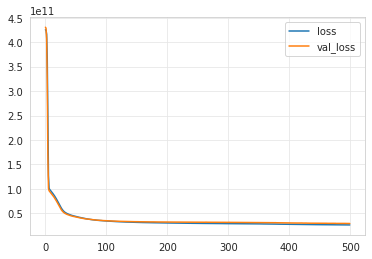

In [51]:
losses=pd.DataFrame(model.history.history)
losses.plot()

Text(0.5, 1.0, 'Training Loss per Epoch')

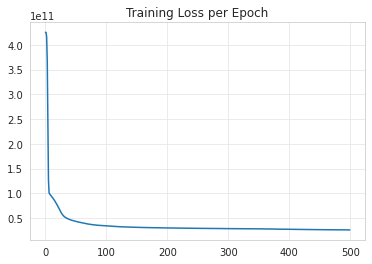

In [52]:
loss=model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title('Training Loss per Epoch')

If optimizer=rmsprop

In [53]:
mod=Sequential()
mod.add(Dense(19,activation='relu'))
mod.add(Dense(19,activation='relu'))
mod.add(Dense(19,activation='relu'))
mod.add(Dense(19,activation='relu'))
mod.add(Dense(1))
mod.compile(optimizer='rmsprop',loss='mse')
mod.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),batch_size=128,epochs=500)

Epoch 1/500
119/119 [==============================] - 1s 3ms/step - loss: 425287450624.0000 - val_loss: 430481571840.0000
Epoch 2/500
119/119 [==============================] - 0s 3ms/step - loss: 425000206336.0000 - val_loss: 429766574080.0000
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 423333691392.0000 - val_loss: 426627858432.0000
Epoch 4/500
119/119 [==============================] - 0s 2ms/step - loss: 417737408512.0000 - val_loss: 417567768576.0000
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 403924025344.0000 - val_loss: 397315801088.0000
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 375896965120.0000 - val_loss: 359098908672.0000
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 327851311104.0000 - val_loss: 298834821120.0000
Epoch 8/500
119/119 [==============================] - 0s 2ms/step - loss: 257068154880.0000 - val_loss: 216834768896.0000
Epoch 9/500
119/

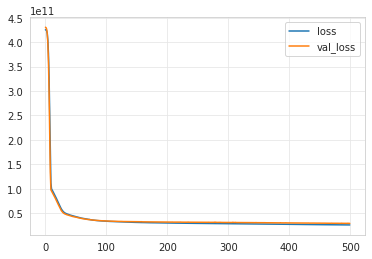

In [54]:
losses=pd.DataFrame(mod.history.history)
losses.plot()

In [65]:
prediction=model.predict(X_test)
mean_absolute_error(y_test,prediction)

105572.0239607446

In [66]:
np.sqrt(mean_squared_error(y_test,prediction))

170995.5559820333

In [67]:
explained_variance_score(y_test,prediction)

0.7799339246117208

In [68]:
df['price'].mean()

540296.5735055795

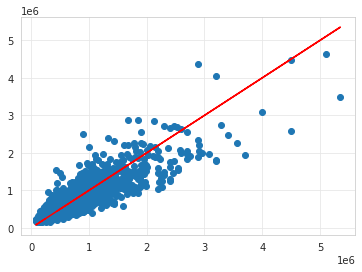

In [72]:
# Our Prediction
plt.scatter(y_test,prediction)
# Perfect Prediction
plt.plot(y_test,y_test,'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


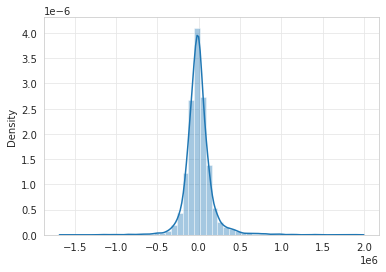

In [74]:
errors=y_test.reshape(6480,1) - prediction
sns.distplot(errors)

To Predict a Brand new house

In [75]:
sample_predict=df.drop('price',axis=1).iloc[59]
sample_predict=scaler.transform(sample_predict.values.reshape(-1,19))
model.predict(sample_predict)

array([[462082.6]], dtype=float32)

In [78]:
df.iloc[59]['price']

430000.0